In [41]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sktime.transformations.panel.dictionary_based import PAA
from sktime.transformations.series.sax import SAX2

from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

from sktime.distances import distance
from tslearn.metrics import dtw as tsldtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from sklearn.metrics import pairwise_distances

from dtaidistance import dtw

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sktime.clustering.k_means import TimeSeriesKMeans
from tslearn.clustering import silhouette_score

In [2]:
from matrixprofile import *

In [3]:
def load_npy(filename):
    return np.load(filename)
X_y_ids = load_npy('X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

In [4]:
X

array([[[4033.9832331 , 4452.53182549, 4493.08463585, ...,
         3163.79769777, 3135.17003015, 3470.55780845]],

       [[1246.7822784 , 1275.03757568, 1389.82545827, ...,
         2652.79362882, 2693.68073676, 2600.65255211]],

       [[ 556.52737148,  570.68821915,  632.79195186, ...,
          549.71984951,  575.6562267 ,  565.24270312]],

       ...,

       [[2302.0929479 , 2354.56289982, 2498.05046408, ...,
         2277.9286643 , 2288.1843156 , 2237.39309882]],

       [[ 277.98730102,  284.18619178,  294.08906347, ...,
          286.62382674,  276.99432885,  260.72051665]],

       [[ 356.0063435 ,  345.85702448,  345.96274818, ...,
          339.33946718,  346.43608034,  352.33679407]]])

In [5]:
y

array(['happy', 'emo', 'world-music', ..., 'world-music', 'sleep',
       'sleep'], dtype='<U17')

In [6]:
ids[0]

'002qpSULhHAw6DGqFxbaO1'

In [7]:
df = pd.DataFrame(np.squeeze(X))
df["genre"] = y
df["ids"] = ids

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,genre,ids
0,4033.983233,4452.531825,4493.084636,4205.104114,4124.152380,4374.528603,4218.922430,4811.479415,5380.497768,5408.836533,...,4136.007023,4515.116157,4272.059542,3179.082991,3119.379434,3163.797698,3135.170030,3470.557808,happy,002qpSULhHAw6DGqFxbaO1
1,1246.782278,1275.037576,1389.825458,1425.923045,1453.146435,1439.394669,1446.677260,1452.278668,1562.862604,1716.595733,...,945.693979,2427.495847,4272.999098,4756.297360,3155.547176,2652.793629,2693.680737,2600.652552,emo,004h8smbIoAkUNDJvVKwkG
2,556.527371,570.688219,632.791952,724.284541,700.265785,637.978949,580.044365,541.837395,538.979271,561.738058,...,651.783128,600.108454,568.681377,537.072023,536.968066,549.719850,575.656227,565.242703,world-music,006ATYzgynEKIPgVaT5LQM
3,2318.553884,2415.404641,2587.678594,2679.752782,2476.585990,2354.537616,2351.667896,2319.100690,2417.571585,2431.619017,...,2369.967771,2435.225332,2516.305110,2457.247966,2398.038946,2382.307384,2390.305834,2520.164300,heavy-metal,00C93bsNIjHStKvr1lPJee
4,2197.095845,2299.780004,2340.115366,2230.133271,2162.143986,2060.925716,2085.023936,2122.772450,2095.381438,2073.004571,...,1884.790511,2036.814810,2283.750682,2403.766504,2551.391082,2413.472908,2248.364802,2249.086879,progressive-house,00CsDW3I9XueUvaXnAvGMm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2714.675059,2273.567285,1794.152523,1461.596435,1486.842231,1576.816447,1656.734425,1676.028261,1779.922921,1737.991497,...,2771.815674,2639.636103,2594.053748,2520.841825,2592.052944,2631.374097,2830.008571,2531.497095,synth-pop,7zmbtfKgZMTQ1GlqBno5T5
9996,618.054847,620.631310,612.652137,636.176379,635.752477,631.399916,605.110771,626.046116,624.747279,591.403780,...,548.647430,551.268466,539.168279,529.838171,567.515093,588.830356,559.373196,558.468585,piano,7zP20CANb26S52imHKKWEc
9997,2302.092948,2354.562900,2498.050464,2485.572104,2368.360732,2397.476901,2450.164601,2463.453644,2638.358828,2428.885493,...,1490.870560,2057.341857,2309.620417,2334.191132,2324.397193,2277.928664,2288.184316,2237.393099,world-music,7zvGj5jjRIBRqT82crTMVf
9998,277.987301,284.186192,294.089063,290.958406,289.316498,298.456330,300.274822,299.111098,301.967315,300.353719,...,288.714580,285.405406,281.218507,277.622963,295.527480,286.623827,276.994329,260.720517,sleep,7zwddyEol0Hg5K8HQd3srX


In [9]:
df["genre"].value_counts()

genre
happy                500
emo                  500
new-age              500
minimal-techno       500
folk                 500
j-idol               500
sleep                500
kids                 500
songwriter           500
sertanejo            500
goth                 500
piano                500
opera                500
synth-pop            500
honky-tonk           500
mpb                  500
progressive-house    500
heavy-metal          500
world-music          500
salsa                500
Name: count, dtype: int64

In [10]:
duplicated_rows = df[df.duplicated(subset=['ids'], keep=False)]
duplicated_rows

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,genre,ids
50,1524.045931,1565.283185,1561.094299,1404.522495,1371.727394,1905.797536,2638.114007,2740.620277,2323.697611,1926.740583,...,1369.749417,1290.451983,1184.574351,1137.589864,1130.197215,1166.399847,1148.006346,1051.536807,folk,02sas1xqIwRm7iWSoHDvKe
51,1524.045931,1565.283185,1561.094299,1404.522495,1371.727394,1905.797536,2638.114007,2740.620277,2323.697611,1926.740583,...,1369.749417,1290.451983,1184.574351,1137.589864,1130.197215,1166.399847,1148.006346,1051.536807,songwriter,02sas1xqIwRm7iWSoHDvKe
105,2095.064259,2024.107331,2086.744302,2089.595419,1952.835021,1936.743461,1975.496627,1885.141460,2101.689299,2375.884460,...,2645.269186,2393.902769,2142.523692,2220.375380,2590.470685,2449.898569,2313.198630,2124.735985,folk,05fL1P3yj5DLIE9mF7pf1z
106,2095.064259,2024.107331,2086.744302,2089.595419,1952.835021,1936.743461,1975.496627,1885.141460,2101.689299,2375.884460,...,2645.269186,2393.902769,2142.523692,2220.375380,2590.470685,2449.898569,2313.198630,2124.735985,songwriter,05fL1P3yj5DLIE9mF7pf1z
190,623.055170,626.363910,620.719324,611.339359,622.757634,654.092969,607.390436,617.071963,609.068735,599.031542,...,552.201095,554.617947,574.633221,560.386815,552.829511,565.085919,565.642722,539.332172,new-age,0a8JnrGsVJstKtEzJCnGgD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,1275.346285,1275.148774,1320.030856,1175.938389,990.250387,894.146686,792.416475,739.566748,645.049510,610.632859,...,1742.815881,1720.007740,1729.193910,1770.721277,1681.483437,1721.586551,1751.809726,1804.015601,songwriter,7uhINGViZPygI2AljxO8KN
9904,677.683042,743.032755,1086.079076,1112.196679,821.195949,781.523862,785.979010,914.528539,1293.263144,1317.927699,...,2352.256677,2219.467455,2137.021455,2073.791445,2174.931367,2152.587834,2213.430852,2106.177905,new-age,7uzeHzJx33aqpdeKyhXBwh
9905,677.683042,743.032755,1086.079076,1112.196679,821.195949,781.523862,785.979010,914.528539,1293.263144,1317.927699,...,2352.256677,2219.467455,2137.021455,2073.791445,2174.931367,2152.587834,2213.430852,2106.177905,opera,7uzeHzJx33aqpdeKyhXBwh
9987,1963.589458,1971.503000,1832.191879,1823.110972,1660.998854,1417.738185,1366.880220,1388.351057,1406.000826,1491.555994,...,1007.536872,1008.822150,886.427072,856.235289,947.292976,1042.662773,933.063463,837.314079,folk,7yzbimr8WVyAtBX3Eg6UL9


In [11]:
df_no_duplicates = df.drop_duplicates(subset=['ids'])
df_no_duplicates = df_no_duplicates.reset_index(drop=True)
df_no_duplicates

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,genre,ids
0,4033.983233,4452.531825,4493.084636,4205.104114,4124.152380,4374.528603,4218.922430,4811.479415,5380.497768,5408.836533,...,4136.007023,4515.116157,4272.059542,3179.082991,3119.379434,3163.797698,3135.170030,3470.557808,happy,002qpSULhHAw6DGqFxbaO1
1,1246.782278,1275.037576,1389.825458,1425.923045,1453.146435,1439.394669,1446.677260,1452.278668,1562.862604,1716.595733,...,945.693979,2427.495847,4272.999098,4756.297360,3155.547176,2652.793629,2693.680737,2600.652552,emo,004h8smbIoAkUNDJvVKwkG
2,556.527371,570.688219,632.791952,724.284541,700.265785,637.978949,580.044365,541.837395,538.979271,561.738058,...,651.783128,600.108454,568.681377,537.072023,536.968066,549.719850,575.656227,565.242703,world-music,006ATYzgynEKIPgVaT5LQM
3,2318.553884,2415.404641,2587.678594,2679.752782,2476.585990,2354.537616,2351.667896,2319.100690,2417.571585,2431.619017,...,2369.967771,2435.225332,2516.305110,2457.247966,2398.038946,2382.307384,2390.305834,2520.164300,heavy-metal,00C93bsNIjHStKvr1lPJee
4,2197.095845,2299.780004,2340.115366,2230.133271,2162.143986,2060.925716,2085.023936,2122.772450,2095.381438,2073.004571,...,1884.790511,2036.814810,2283.750682,2403.766504,2551.391082,2413.472908,2248.364802,2249.086879,progressive-house,00CsDW3I9XueUvaXnAvGMm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,2714.675059,2273.567285,1794.152523,1461.596435,1486.842231,1576.816447,1656.734425,1676.028261,1779.922921,1737.991497,...,2771.815674,2639.636103,2594.053748,2520.841825,2592.052944,2631.374097,2830.008571,2531.497095,synth-pop,7zmbtfKgZMTQ1GlqBno5T5
9860,618.054847,620.631310,612.652137,636.176379,635.752477,631.399916,605.110771,626.046116,624.747279,591.403780,...,548.647430,551.268466,539.168279,529.838171,567.515093,588.830356,559.373196,558.468585,piano,7zP20CANb26S52imHKKWEc
9861,2302.092948,2354.562900,2498.050464,2485.572104,2368.360732,2397.476901,2450.164601,2463.453644,2638.358828,2428.885493,...,1490.870560,2057.341857,2309.620417,2334.191132,2324.397193,2277.928664,2288.184316,2237.393099,world-music,7zvGj5jjRIBRqT82crTMVf
9862,277.987301,284.186192,294.089063,290.958406,289.316498,298.456330,300.274822,299.111098,301.967315,300.353719,...,288.714580,285.405406,281.218507,277.622963,295.527480,286.623827,276.994329,260.720517,sleep,7zwddyEol0Hg5K8HQd3srX


In [275]:
df_no_duplicates.to_csv('tsdf_no_duplicates.csv', index=False)

In [3]:
df_no_duplicates = pd.read_csv('tsdf_no_duplicates.csv')

In [4]:
df_no_duplicates["genre"].value_counts()

happy                500
emo                  500
new-age              500
minimal-techno       500
folk                 500
j-idol               500
kids                 500
goth                 500
honky-tonk           500
progressive-house    500
heavy-metal          500
world-music          500
salsa                500
sleep                498
mpb                  497
synth-pop            496
sertanejo            495
piano                475
opera                468
songwriter           435
Name: genre, dtype: int64

# motiffs


In [9]:
ts = df.iloc[0][:-2]
index = pd.date_range(start=df.index[0], periods=len(ts.values), freq='MS')
ts = pd.Series(ts.values, index)
ts = ts.astype(float)

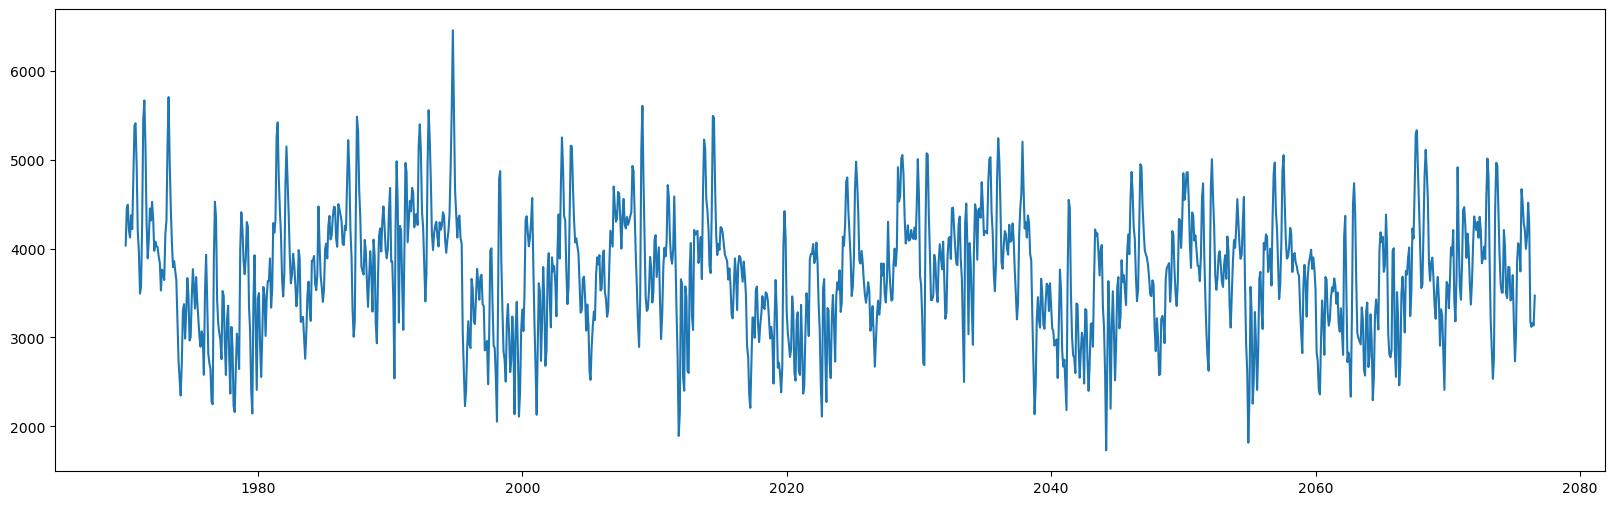

In [10]:
plt.figure(figsize=(20,6))
plt.plot(ts)
plt.show()

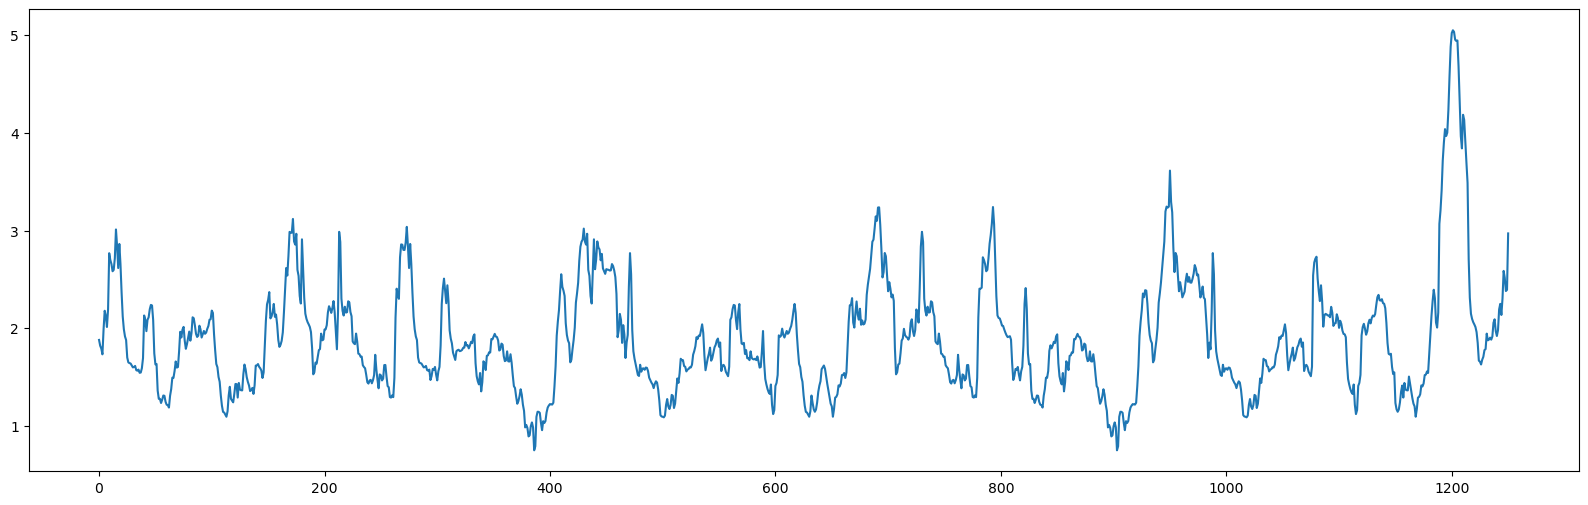

In [11]:
w = 30
mp, mpi = matrixProfile.stomp(ts.values, w)

plt.figure(figsize=(20,6))
plt.plot(mp)
plt.show()

In [12]:
mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=3)

In [13]:
mo

[[386, 903], [501, 630, 1018], [113, 1147]]

In [14]:
mod

[0.750280334445961, 1.0873404513828473, 1.093639736056285]

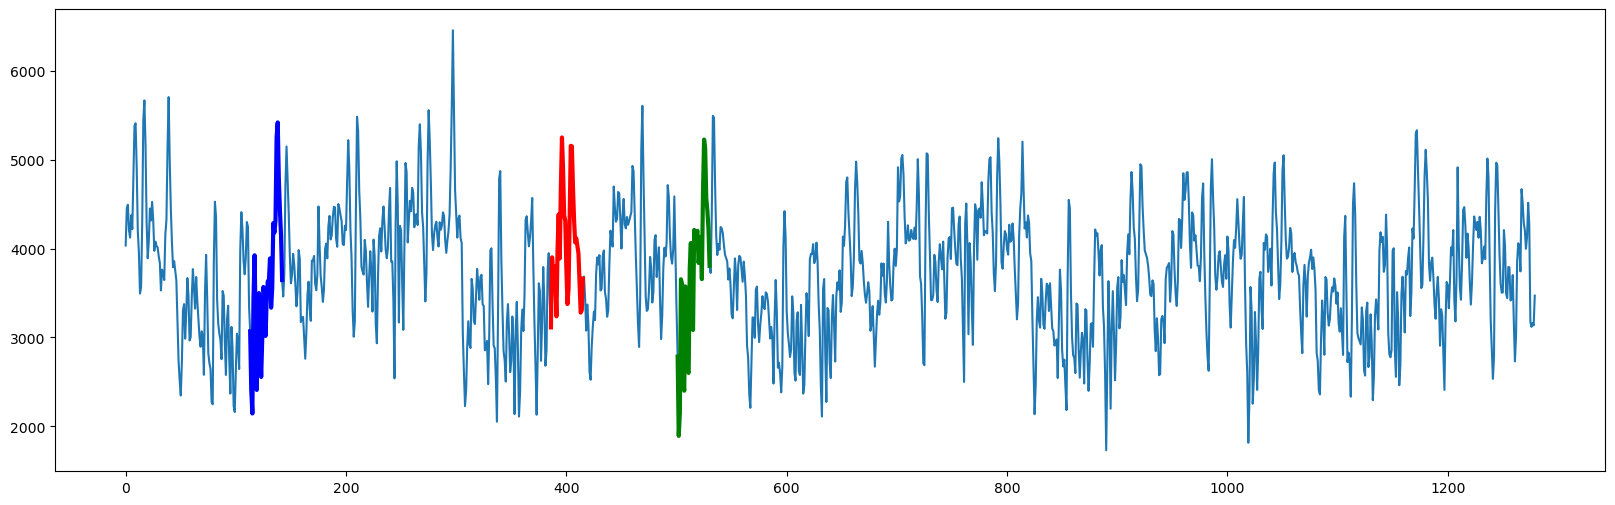

In [15]:
plt.figure(figsize=(20,6))
plt.plot(ts.values)
colors = ['r', 'g', 'b']
for m, d, c in zip(mo, mod, colors):
    i = m[0]
    m_shape = ts.values[i:i+w]
    plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

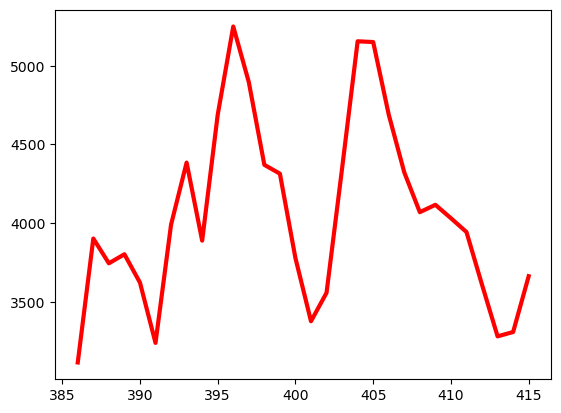

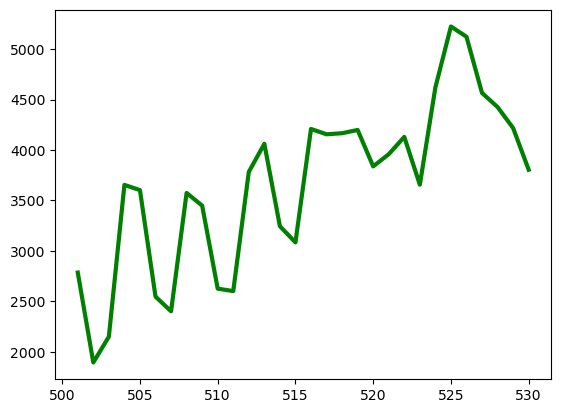

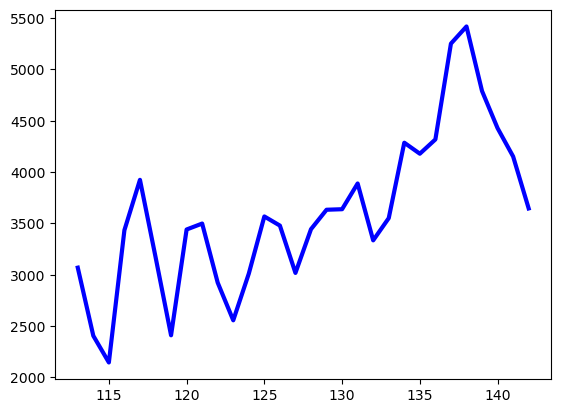

In [16]:
for m, d, c in zip(mo, mod, colors):
    i = m[0]
    m_shape = ts.values[i:i+w]
    plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# capendo DF di 3 motifs per ts

In [14]:
ts = df.iloc[0][:-2]
index = pd.date_range(start=df.index[0], periods=len(ts.values), freq='MS')
ts = pd.Series(ts.values, index)
ts = ts.astype(float)

In [8]:
num_records = 1000

genre_counts = df_no_duplicates['genre'].value_counts()


proportions = (genre_counts / len(df_no_duplicates)).to_dict()


records_per_genre_sample = {genre: int(num_records * proportion) for genre, proportion in proportions.items()}
sampled_dfs = []
for genre, num_records in records_per_genre_sample.items():
    genre_df = df_no_duplicates[df_no_duplicates['genre'] == genre].sample(n=num_records, random_state=42)
    sampled_dfs.append(genre_df)
sampled_df = pd.concat(sampled_dfs)

sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
sampled_df

,0,1,2,3,4,5,6,7,8,9,...,1272,1273,1274,1275,1276,1277,1278,1279,genre,ids
0,1482.475824,1499.973343,1633.096606,1607.239228,1652.603327,1712.739337,1779.378291,1859.319668,1881.984115,1929.132061,...,2347.087391,2205.989525,1998.024079,1898.211804,1842.734928,1773.383291,1876.959966,1882.647776,folk,1dtx9AyVFLG001tZ6aNIAf
1,1197.536980,1190.824165,1268.762524,1385.769010,1600.948784,1666.736882,1572.733726,1131.161462,1243.171247,3458.148638,...,4332.896778,3971.618855,3848.321538,5097.367364,4483.020820,5096.353879,5284.436305,3964.531718,kids,5bwnexvD5cm2E7Wl75mQ1x
2,2770.145855,2777.067412,2584.131257,2232.819730,2076.124112,2024.005571,2006.435202,1834.515090,1677.233984,1615.025127,...,2728.033077,3165.183236,3311.762345,3053.530213,2782.405935,3059.288654,3710.733705,3924.081566,heavy-metal,1AbUol55LyKcoh4WM2zJCJ
3,1954.523444,1687.473690,1564.673915,1354.776990,1404.308410,1672.288660,1763.122512,1717.830836,1512.868171,1808.307394,...,3375.405477,3006.807399,2956.936274,2818.500884,3544.317843,3448.058290,2542.124269,2194.500579,kids,76ycdvBwTc9nc4YPHDAbID
4,1227.524179,968.060357,1008.316344,2516.701502,4545.212276,5418.207157,5350.190315,4981.909590,3828.239434,2036.603495,...,3178.996603,2800.592293,2767.613273,2285.346655,2194.134967,2058.296887,1357.950641,1136.813704,emo,32HzLojF1gTmkYiHlyyoWZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,1469.408372,1728.014032,1397.419508,914.349954,752.388758,730.937459,750.156734,904.342704,918.126286,851.804049,...,1550.112479,1630.260156,1311.614925,1138.902917,1001.944503,985.434361,1107.655903,1153.024374,new-age,5RVcMhbIaIfekTjo7zL8ij
985,1984.750450,2043.585644,1996.385337,1897.846536,1810.290987,1794.545511,1839.469299,1769.729640,1914.170870,1969.801705,...,2841.426660,2817.112488,2696.627236,2681.269493,2666.244878,2750.945244,2892.479040,2864.817682,j-idol,7rU6Iebxzlvqy5t857bKFq
986,505.084228,503.866657,532.975196,747.372241,780.428055,684.823988,613.101457,598.722299,753.543648,921.801418,...,529.021846,529.801930,530.406799,529.005443,532.789017,525.086023,519.014675,521.713888,piano,1DOMGngtpVWJBCQpu2jOeP
987,3486.397424,3302.437562,2884.261591,3271.236252,3298.739408,2791.351992,2390.102234,2183.676408,1996.579782,1963.560373,...,1212.660059,1157.909734,1175.734404,1214.649511,1219.073149,1248.194601,1183.425360,1127.173605,honky-tonk,5boKQMMd8DzvsqFiLMxN6g


In [9]:
sampled_df['genre'].value_counts()

folk                 50
kids                 50
happy                50
sleep                50
world-music          50
salsa                50
progressive-house    50
minimal-techno       50
synth-pop            50
sertanejo            50
mpb                  50
honky-tonk           50
goth                 50
new-age              50
j-idol               50
emo                  50
heavy-metal          50
piano                48
opera                47
songwriter           44
Name: genre, dtype: int64

In [5]:
%%time

w = 50
columns = list(range(w)) + ['genre'] + ['ids']
motifdataframe = pd.DataFrame(columns=columns)



for row in df_no_duplicates.iterrows():
    
    ts = row[1][:-2]
    index = pd.date_range(start=df_no_duplicates.index[0], periods=len(ts.values), freq='MS')
    ts = pd.Series(ts.values, index)
    ts = ts.astype(float)
    
    genre = row[1].iloc[-2]
    idts = row[1].iloc[-1]
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    mo, mod  = motifs.motifs(ts.values, (mp, mpi), max_motifs=3)
    
    for mot in mo:
        index = mot[0]
        m_shape = ts.values[index:index+w]
        riga =  list(m_shape) + [genre] + [idts] 
        motifdataframe.loc[len(motifdataframe.index)] = riga
    



C:\Users\jullo\anaconda3\Lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\jullo\anaconda3\Lib\site-packages\matrixprofile\utils.py:177: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean*q_mean)/(m*std*q_std))
C:\Users\jullo\anaconda3\Lib\site-packages\matrixprofile\distanceProfile.py:118: RuntimeWarning: invalid value encountered in sqrt
  distanceProfile = np.real(np.sqrt(mass(query,tsB).astype(complex)))
C:\Users\jullo\anaconda3\Lib\site-packages\matrixprofile\utils.py:200: RuntimeWarning: divide by zero encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))
C:\Users\jullo\anaconda3\Lib\site-packages\matrixprofile\utils.py:200: RuntimeWarning: invalid value encountered in divide
  res = 2*m*(1-(dot-m*mean[index]*mean)/(m*std[index]*std))
C:\Users\jullo\anaconda3\Lib\site-packages\matrixprofile\distanceProfile.py:126: Runt

CPU times: total: 33min 47s
Wall time: 33min 44s


In [6]:
motifdataframe

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,genre,ids
0,2681.712622,2858.491430,3758.990040,3948.437418,3398.478458,3113.391604,3901.681420,3744.092489,3801.513056,3621.275507,...,2892.671852,3120.329944,3290.282288,3195.602586,3710.978109,3901.036234,3822.522181,3926.564876,happy,002qpSULhHAw6DGqFxbaO1
1,2785.025645,1893.239513,2149.388462,3654.574047,3602.783345,2546.465057,2401.036918,3574.742754,3448.989743,2625.753595,...,4040.429264,3930.634144,3894.859649,3854.897720,3651.278207,3776.456903,3596.133480,3256.968471,happy,002qpSULhHAw6DGqFxbaO1
2,2842.002363,1905.425760,1420.792710,1349.614135,1256.082028,1181.104003,1208.274161,1405.550723,1541.547016,1504.288615,...,2171.433012,2199.369457,2197.394265,2319.250379,2269.763484,2068.185016,2122.869641,3088.953117,emo,004h8smbIoAkUNDJvVKwkG
3,2368.574534,1926.750163,1732.732972,1660.084369,1646.471643,1733.148201,1582.025392,1583.057696,3439.102078,3865.746914,...,1346.734709,1525.249607,2455.191664,4063.211548,4525.853367,4321.622647,4153.385437,3301.783740,emo,004h8smbIoAkUNDJvVKwkG
4,2610.927419,2155.626478,2162.225584,1887.289564,1559.973428,1815.908515,2410.322983,2490.691220,3212.291080,2703.608210,...,1391.939425,2105.328891,3942.101840,4611.906378,3732.531537,2734.648904,2623.021984,2431.547843,emo,004h8smbIoAkUNDJvVKwkG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28575,301.967315,300.353719,308.451952,314.211462,306.103580,301.906456,312.707666,326.459567,326.941102,324.643705,...,330.387251,334.923376,328.207807,324.406617,326.545184,325.346383,321.643788,320.082706,sleep,7zwddyEol0Hg5K8HQd3srX
28576,377.659008,373.131004,381.172515,377.423507,375.050915,380.815158,379.068266,393.672083,393.135357,383.011361,...,323.740597,326.363961,323.052136,329.228304,334.745067,347.070707,354.732655,357.023671,sleep,7zwddyEol0Hg5K8HQd3srX
28577,433.989224,456.449446,469.525747,462.462277,427.663150,420.876277,426.932445,424.762678,438.469291,431.348381,...,374.299392,373.986146,366.428156,366.444964,365.124232,364.760607,361.657824,369.483972,sleep,7zwWkmiQaVt3AFXUnhBlZk
28578,312.615813,310.284081,314.296825,323.550483,322.300706,325.686133,325.522961,337.876666,335.551418,334.226831,...,356.437363,373.376161,387.698549,390.570762,402.355277,409.956769,392.708698,383.081157,sleep,7zwWkmiQaVt3AFXUnhBlZk


In [8]:
motifdataframe.to_csv('motifdf30k_50.csv', index=False)

In [6]:
motifdf30k_50 = pd.read_csv('motifdf30k_50.csv')

In [11]:
X = motifdataframe.iloc[:,1:-1].values
y = motifdataframe['genre']
X.shape, y.shape

((2871, 30), (2871,))

In [251]:
y = y.reset_index(drop=True)

In [20]:
%%time

knn = KNeighborsTimeSeriesClassifier(n_neighbors=20, distance='euclidean', weights='distance')

k_folds = 20

kf = KFold(n_splits=k_folds)


true_labels = []
predicted_labels = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    true_labels.append(y_test)
    predicted_labels.append(y_pred)
    
true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)
print(classification_report(true_labels, predicted_labels))


                   precision    recall  f1-score   support

              emo       0.09      0.04      0.06       146
             folk       0.12      0.04      0.06       143
             goth       0.12      0.11      0.12       145
            happy       0.28      0.24      0.26       143
      heavy-metal       0.09      0.22      0.13       144
       honky-tonk       0.14      0.21      0.17       147
           j-idol       0.12      0.20      0.15       148
             kids       0.11      0.01      0.02       144
   minimal-techno       0.64      0.37      0.47       147
              mpb       0.09      0.04      0.05       142
          new-age       0.36      0.51      0.42       148
            opera       0.13      0.19      0.15       134
            piano       0.63      0.58      0.61       142
progressive-house       0.20      0.09      0.12       146
            salsa       0.27      0.06      0.10       148
        sertanejo       0.17      0.25      0.20       

w=20, 0.20

w=30, 0.20/21

w=40, 0.19

W=50, 0.19

w=100, 0.18

In [21]:
#motifs
motifs30 = motifdataframe.iloc[:,1:-1].values

In [22]:
motifs30.shape

(2871, 30)

In [111]:
clusterer = TimeSeriesKMeans(n_clusters=5, metric='dtw')

In [112]:
%%time
clusterer.fit(motifs30)

Exception ignored in: <function ObjectRef.__del__ at 0x0000013DBA2505E0>
Traceback (most recent call last):
  File "C:\Users\jullo\anaconda3\Lib\site-packages\llvmlite\binding\ffi.py", line 373, in __del__
    self.close()
  File "C:\Users\jullo\anaconda3\Lib\site-packages\llvmlite\binding\ffi.py", line 333, in close
    self._dispose()
  File "C:\Users\jullo\anaconda3\Lib\site-packages\llvmlite\binding\module.py", line 77, in _dispose
    self._capi.LLVMPY_DisposeModule(self)
  File "C:\Users\jullo\anaconda3\Lib\site-packages\llvmlite\binding\ffi.py", line 190, in __call__
    return self._cfn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt: 


CPU times: total: 42.5 s
Wall time: 43 s


TimeSeriesKMeans(n_clusters=5)

In [83]:
labels = clusterer.labels_
motifdataframe["cluster"]  = labels
motifdataframe["cluster"].value_counts()

cluster
4    745
0    672
2    575
3    442
1    437
Name: count, dtype: int64

In [53]:
%%time
dismat_3k_30_fastdtw = pairwise_distances(motifs30, metric=fast_dtw)

CPU times: total: 43.4 s
Wall time: 43 s


In [84]:
%%time
silhouette_score_tslearn = silhouette_score(dismat_3k_30_fastdtw, labels, metric='precomputed' )

CPU times: total: 46.9 ms
Wall time: 47 ms


In [85]:
silhouette_score_tslearn

0.22893178689053384

In [113]:
%%time

silhouette_scores = []
k_values = []

min_k = 2
max_k = 25

for k in range(min_k, max_k + 1):
    
    clusterer = TimeSeriesKMeans(n_clusters=k, metric='dtw', n_init=20)
    clusterer.fit(motifs30)
    labels = clusterer.labels_
    
    silhouette_score_tslearn = silhouette_score(dismat_3k_30_fastdtw, labels, metric='precomputed')
    
    silhouette_scores.append(silhouette_score_tslearn)
    k_values.append(k)

    

CPU times: total: 8h 55min 24s
Wall time: 8h 53min 53s


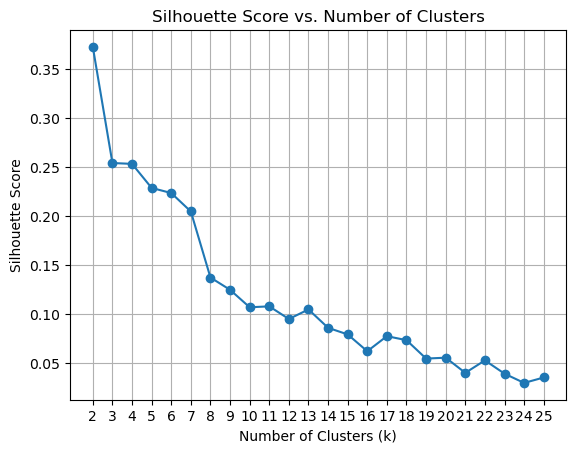

In [114]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# best matching distance

In [10]:
def bmd_optim(ts, mot):
    
    if isinstance(ts, np.ndarray):
        pass
    elif hasattr(ts, 'values'):
        ts = ts.values
    if isinstance(mot, np.ndarray):
        pass
    elif hasattr(mot, 'values'):
        mot = mot.values
        
    w = len(mot)
    i = 0
    best_dis = np.inf
    best_ind = None
    
    while i + w <= len(ts):
        dis = 0
        for a, b in zip(ts[i:i+w], mot):
            dis += (a - b) ** 2
            if dis >= best_dis:
                break
        if dis < best_dis:
            best_dis = dis
            best_ind = i
        i += 1
        
    return np.sqrt(best_dis), best_ind

In [7]:
motifdf30k_50

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,genre,ids
0,2681.712622,2858.491430,3758.990040,3948.437418,3398.478458,3113.391604,3901.681420,3744.092489,3801.513056,3621.275507,...,2892.671852,3120.329944,3290.282288,3195.602586,3710.978109,3901.036234,3822.522181,3926.564876,happy,002qpSULhHAw6DGqFxbaO1
1,2785.025645,1893.239513,2149.388462,3654.574047,3602.783345,2546.465057,2401.036918,3574.742754,3448.989743,2625.753595,...,4040.429264,3930.634144,3894.859649,3854.897720,3651.278207,3776.456903,3596.133480,3256.968471,happy,002qpSULhHAw6DGqFxbaO1
2,2842.002363,1905.425760,1420.792710,1349.614135,1256.082028,1181.104003,1208.274161,1405.550723,1541.547016,1504.288615,...,2171.433012,2199.369457,2197.394265,2319.250379,2269.763484,2068.185016,2122.869641,3088.953117,emo,004h8smbIoAkUNDJvVKwkG
3,2368.574534,1926.750163,1732.732972,1660.084369,1646.471643,1733.148201,1582.025392,1583.057696,3439.102078,3865.746914,...,1346.734709,1525.249607,2455.191664,4063.211548,4525.853367,4321.622647,4153.385437,3301.783740,emo,004h8smbIoAkUNDJvVKwkG
4,2610.927419,2155.626478,2162.225584,1887.289564,1559.973428,1815.908515,2410.322983,2490.691220,3212.291080,2703.608210,...,1391.939425,2105.328891,3942.101840,4611.906378,3732.531537,2734.648904,2623.021984,2431.547843,emo,004h8smbIoAkUNDJvVKwkG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28575,301.967315,300.353719,308.451952,314.211462,306.103580,301.906456,312.707666,326.459567,326.941102,324.643705,...,330.387251,334.923376,328.207807,324.406617,326.545184,325.346383,321.643788,320.082706,sleep,7zwddyEol0Hg5K8HQd3srX
28576,377.659008,373.131004,381.172515,377.423507,375.050915,380.815158,379.068266,393.672083,393.135357,383.011361,...,323.740597,326.363961,323.052136,329.228304,334.745067,347.070707,354.732655,357.023671,sleep,7zwddyEol0Hg5K8HQd3srX
28577,433.989224,456.449446,469.525747,462.462277,427.663150,420.876277,426.932445,424.762678,438.469291,431.348381,...,374.299392,373.986146,366.428156,366.444964,365.124232,364.760607,361.657824,369.483972,sleep,7zwWkmiQaVt3AFXUnhBlZk
28578,312.615813,310.284081,314.296825,323.550483,322.300706,325.686133,325.522961,337.876666,335.551418,334.226831,...,356.437363,373.376161,387.698549,390.570762,402.355277,409.956769,392.708698,383.081157,sleep,7zwWkmiQaVt3AFXUnhBlZk


In [ ]:
%%time

dist_mot_10kX30k = len(motifdf30k_50)
columns = ['ids'] + list(range(dist_mot_10kX30k)) + ['genre']
dist_mot_10kX30k = pd.DataFrame(columns=columns)

iterat = 0

for index_ts in df_no_duplicates.iterrows():
    ts = index_ts[1][:-2].values
    distances = []
    
    for index_mot in motifdf30k_50.iterrows():
        mot = index_mot[1][:-2].values
        best_dis = bmd_optim(ts, mot)
        distances.append(best_dis[0])

    genre = index_ts[1][-2]
    idts = index_ts[1][-1]
    riga = [idts] + distances + [genre]
    dist_mot_10kX30k.loc[len(dist_mot_10kX30k.index)] = riga
    
#     iterat += 1
#     if iterat == 100:
#         break

<timed exec>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<timed exec>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<timed exec>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<timed exec>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<tim

In [ ]:
dist_mot_10kX30k.to_csv('dist_mot_10kX30k.csv', index=False)

In [9]:
dist_mot_10kX30k = pd.read_csv('dist_mot_10kX30k.csv')

# prova 20-means come prima per impurità

In [14]:
X = motifdataframe.iloc[:,1:-1].values
y = motifdataframe['genre']
X.shape, y.shape


((2871, 30), (2871,))

In [15]:
clusterer = TimeSeriesKMeans(n_clusters=20, metric='euclidean')

In [16]:
%%time
clusterer.fit(X)

CPU times: total: 18.5 s
Wall time: 18.9 s


TimeSeriesKMeans(metric='euclidean', n_clusters=20)

In [17]:
labels = clusterer.labels_

In [18]:
motifdataframe['cluster'] = labels

In [19]:
motifdataframe['cluster'].value_counts()

9     319
13    254
11    247
8     240
0     239
3     235
4     206
12    171
5     146
2     114
16     99
10     93
6      90
17     80
15     74
18     61
7      52
1      51
14     51
19     49
Name: cluster, dtype: int64

In [22]:
from collections import Counter

for clusterid in range(0, 20):
    
    genrecluster = motifdataframe[motifdataframe['cluster']==clusterid]['genre'].values
    genre_counts = Counter(genrecluster)
    most_common_genre = genre_counts.most_common(1)[0][0]
    most_common_count = genre_counts[most_common_genre]

    impurita = most_common_count/len(genrecluster)
    print(clusterid, len(genrecluster), impurita, most_common_genre)


0 239 0.2217573221757322 happy
1 51 0.1568627450980392 j-idol
2 114 0.21929824561403508 happy
3 235 0.11063829787234042 world-music
4 206 0.0970873786407767 heavy-metal
5 146 0.0958904109589041 sertanejo
6 90 0.2 sertanejo
7 52 0.46153846153846156 minimal-techno
8 240 0.10833333333333334 folk
9 319 0.15673981191222572 heavy-metal
10 93 0.17204301075268819 sertanejo
11 247 0.4574898785425101 piano
12 171 0.15204678362573099 honky-tonk
13 254 0.20866141732283464 new-age
14 51 0.2549019607843137 sertanejo
15 74 0.28378378378378377 minimal-techno
16 99 0.13131313131313133 mpb
17 80 0.15 honky-tonk
18 61 0.14754098360655737 kids
19 49 0.1836734693877551 sertanejo


In [23]:
motifdataframe[motifdataframe['cluster']==11]

,ids,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,genre,cluster
21,29cWhgW69qlqEcji31Dr0D,526.024448,513.764362,478.851346,453.755465,444.652832,436.297671,436.636509,448.891705,472.335084,...,544.795453,972.070235,992.393351,992.440772,963.323270,919.971244,909.238584,892.260263,new-age,11
41,7etGs69UCKGxJIHxKFe7BD,965.869134,1002.353997,945.871160,921.720791,874.447710,876.727887,888.014319,876.821776,872.762828,...,696.277305,711.217831,705.572624,676.749138,669.378824,666.710200,663.530644,668.708858,piano,11
42,7etGs69UCKGxJIHxKFe7BD,960.632612,946.573199,900.241252,984.157011,1031.503350,950.799548,867.494016,939.191418,993.557046,...,750.105007,778.877899,756.729452,712.864472,706.929958,705.274134,676.053396,649.835863,piano,11
43,7etGs69UCKGxJIHxKFe7BD,737.598024,727.389988,724.026453,701.872782,777.997582,766.376120,716.961506,691.047015,698.221866,...,999.906586,958.870530,910.847146,880.568544,846.435808,822.010827,791.810780,808.745113,piano,11
47,3yXQyJLMVElujd88Gt4fAf,223.326638,215.824377,214.731920,211.595972,207.697907,209.247888,211.754546,204.366326,198.980669,...,352.549561,351.756798,336.368069,338.581134,345.068164,342.610114,338.718754,333.898707,piano,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,1DOMGngtpVWJBCQpu2jOeP,490.440692,448.252718,450.405595,439.210992,438.372913,470.670718,493.560460,468.812875,446.714887,...,427.424372,435.907944,433.763989,431.230158,443.365299,471.761160,685.247001,702.452224,piano,11
2864,1DOMGngtpVWJBCQpu2jOeP,555.946231,532.221256,537.944486,608.006868,739.542831,713.815759,660.167076,640.670103,627.000743,...,530.869124,500.895456,489.061945,506.944286,518.980883,548.140883,587.576098,816.377636,piano,11
2868,5Q2GzK2v317XDi54nmgnU4,1211.757422,1190.972250,1137.145772,1121.229812,1065.520611,1063.986630,1009.432070,857.889693,778.720817,...,791.119394,790.871798,796.297341,797.533417,808.937537,817.814776,810.688829,796.220960,new-age,11
2869,5Q2GzK2v317XDi54nmgnU4,754.948678,792.282382,766.814915,743.038220,763.234666,768.867901,799.574230,789.669714,813.973510,...,737.610024,798.984086,866.036629,886.864119,893.095427,858.213155,852.802262,863.278199,new-age,11


In [24]:
motifcluster11 = motifdataframe[motifdataframe['cluster']==11].iloc[:,1: -2]

In [26]:
centroidmotif11 = np.mean(motifcluster11, axis=0)


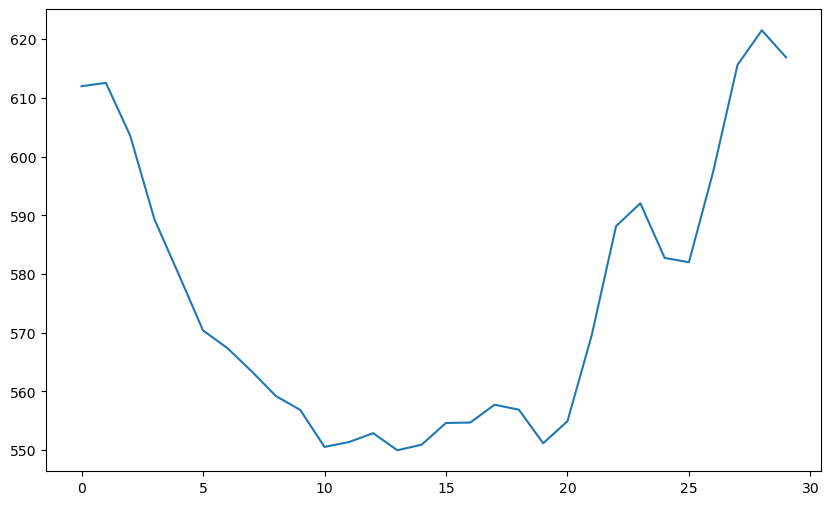

In [29]:
plt.figure(figsize=(10,6))
plt.plot(centroidmotif11.values)
plt.show()

# prova 20-means come prima per impurità ma su 30k motif da 50

In [8]:
motifdf30k_50

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,genre,ids
0,2681.712622,2858.491430,3758.990040,3948.437418,3398.478458,3113.391604,3901.681420,3744.092489,3801.513056,3621.275507,...,2892.671852,3120.329944,3290.282288,3195.602586,3710.978109,3901.036234,3822.522181,3926.564876,happy,002qpSULhHAw6DGqFxbaO1
1,2785.025645,1893.239513,2149.388462,3654.574047,3602.783345,2546.465057,2401.036918,3574.742754,3448.989743,2625.753595,...,4040.429264,3930.634144,3894.859649,3854.897720,3651.278207,3776.456903,3596.133480,3256.968471,happy,002qpSULhHAw6DGqFxbaO1
2,2842.002363,1905.425760,1420.792710,1349.614135,1256.082028,1181.104003,1208.274161,1405.550723,1541.547016,1504.288615,...,2171.433012,2199.369457,2197.394265,2319.250379,2269.763484,2068.185016,2122.869641,3088.953117,emo,004h8smbIoAkUNDJvVKwkG
3,2368.574534,1926.750163,1732.732972,1660.084369,1646.471643,1733.148201,1582.025392,1583.057696,3439.102078,3865.746914,...,1346.734709,1525.249607,2455.191664,4063.211548,4525.853367,4321.622647,4153.385437,3301.783740,emo,004h8smbIoAkUNDJvVKwkG
4,2610.927419,2155.626478,2162.225584,1887.289564,1559.973428,1815.908515,2410.322983,2490.691220,3212.291080,2703.608210,...,1391.939425,2105.328891,3942.101840,4611.906378,3732.531537,2734.648904,2623.021984,2431.547843,emo,004h8smbIoAkUNDJvVKwkG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28575,301.967315,300.353719,308.451952,314.211462,306.103580,301.906456,312.707666,326.459567,326.941102,324.643705,...,330.387251,334.923376,328.207807,324.406617,326.545184,325.346383,321.643788,320.082706,sleep,7zwddyEol0Hg5K8HQd3srX
28576,377.659008,373.131004,381.172515,377.423507,375.050915,380.815158,379.068266,393.672083,393.135357,383.011361,...,323.740597,326.363961,323.052136,329.228304,334.745067,347.070707,354.732655,357.023671,sleep,7zwddyEol0Hg5K8HQd3srX
28577,433.989224,456.449446,469.525747,462.462277,427.663150,420.876277,426.932445,424.762678,438.469291,431.348381,...,374.299392,373.986146,366.428156,366.444964,365.124232,364.760607,361.657824,369.483972,sleep,7zwWkmiQaVt3AFXUnhBlZk
28578,312.615813,310.284081,314.296825,323.550483,322.300706,325.686133,325.522961,337.876666,335.551418,334.226831,...,356.437363,373.376161,387.698549,390.570762,402.355277,409.956769,392.708698,383.081157,sleep,7zwWkmiQaVt3AFXUnhBlZk


In [10]:
X = motifdf30k_50.iloc[:,:-2].values
y = motifdf30k_50['genre']
X.shape, y.shape


((28580, 50), (28580,))

In [11]:
clusterer = TimeSeriesKMeans(n_clusters=20, metric='euclidean')

In [12]:
%%time
clusterer.fit(X)

CPU times: total: 8min 23s
Wall time: 8min 19s


TimeSeriesKMeans(metric='euclidean', n_clusters=20)

In [13]:
labels = clusterer.labels_

In [14]:
motifdf30k_50['cluster'] = labels

In [15]:
motifdf30k_50['cluster'].value_counts()

cluster
7     3477
6     3337
0     2736
11    2365
16    2224
5     2194
17    1954
4     1781
15    1030
18     930
9      853
14     805
2      796
12     667
3      627
8      625
13     618
19     577
1      552
10     432
Name: count, dtype: int64

In [16]:
from collections import Counter

for clusterid in range(0, 20):
    
    genrecluster = motifdf30k_50[motifdf30k_50['cluster']==clusterid]['genre'].values
    genre_counts = Counter(genrecluster)
    most_common_genre = genre_counts.most_common(1)[0][0]
    most_common_count = genre_counts[most_common_genre]

    impurita = most_common_count/len(genrecluster)
    print(clusterid, len(genrecluster), impurita, most_common_genre)


0 2736 0.09576023391812866 honky-tonk
1 552 0.11413043478260869 sertanejo
2 796 0.09798994974874371 kids
3 627 0.12121212121212122 sertanejo
4 1781 0.1128579449747333 honky-tonk
5 2194 0.15861440291704648 honky-tonk
6 3337 0.1648186994306263 j-idol
7 3477 0.13085993672706356 heavy-metal
8 625 0.24 minimal-techno
9 853 0.09495896834701055 sertanejo
10 432 0.30092592592592593 minimal-techno
11 2365 0.22241014799154335 happy
12 667 0.2128935532233883 happy
13 618 0.24757281553398058 minimal-techno
14 805 0.10062111801242236 mpb
15 1030 0.12524271844660195 sertanejo
16 2224 0.41052158273381295 piano
17 1954 0.24974411463664278 new-age
18 930 0.11397849462365592 mpb
19 577 0.14038128249566725 sertanejo


In [18]:
motifdf30k_50[motifdf30k_50['cluster']==16]['genre'].value_counts()

genre
piano                913
new-age              509
sleep                505
world-music          101
songwriter            54
opera                 45
folk                  29
minimal-techno        29
emo                    9
synth-pop              7
progressive-house      7
goth                   6
honky-tonk             4
mpb                    3
kids                   3
Name: count, dtype: int64

In [19]:
motifdf30k_50

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,genre,ids,cluster
0,2681.712622,2858.491430,3758.990040,3948.437418,3398.478458,3113.391604,3901.681420,3744.092489,3801.513056,3621.275507,...,3120.329944,3290.282288,3195.602586,3710.978109,3901.036234,3822.522181,3926.564876,happy,002qpSULhHAw6DGqFxbaO1,12
1,2785.025645,1893.239513,2149.388462,3654.574047,3602.783345,2546.465057,2401.036918,3574.742754,3448.989743,2625.753595,...,3930.634144,3894.859649,3854.897720,3651.278207,3776.456903,3596.133480,3256.968471,happy,002qpSULhHAw6DGqFxbaO1,12
2,2842.002363,1905.425760,1420.792710,1349.614135,1256.082028,1181.104003,1208.274161,1405.550723,1541.547016,1504.288615,...,2199.369457,2197.394265,2319.250379,2269.763484,2068.185016,2122.869641,3088.953117,emo,004h8smbIoAkUNDJvVKwkG,1
3,2368.574534,1926.750163,1732.732972,1660.084369,1646.471643,1733.148201,1582.025392,1583.057696,3439.102078,3865.746914,...,1525.249607,2455.191664,4063.211548,4525.853367,4321.622647,4153.385437,3301.783740,emo,004h8smbIoAkUNDJvVKwkG,14
4,2610.927419,2155.626478,2162.225584,1887.289564,1559.973428,1815.908515,2410.322983,2490.691220,3212.291080,2703.608210,...,2105.328891,3942.101840,4611.906378,3732.531537,2734.648904,2623.021984,2431.547843,emo,004h8smbIoAkUNDJvVKwkG,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28575,301.967315,300.353719,308.451952,314.211462,306.103580,301.906456,312.707666,326.459567,326.941102,324.643705,...,334.923376,328.207807,324.406617,326.545184,325.346383,321.643788,320.082706,sleep,7zwddyEol0Hg5K8HQd3srX,16
28576,377.659008,373.131004,381.172515,377.423507,375.050915,380.815158,379.068266,393.672083,393.135357,383.011361,...,326.363961,323.052136,329.228304,334.745067,347.070707,354.732655,357.023671,sleep,7zwddyEol0Hg5K8HQd3srX,16
28577,433.989224,456.449446,469.525747,462.462277,427.663150,420.876277,426.932445,424.762678,438.469291,431.348381,...,373.986146,366.428156,366.444964,365.124232,364.760607,361.657824,369.483972,sleep,7zwWkmiQaVt3AFXUnhBlZk,16
28578,312.615813,310.284081,314.296825,323.550483,322.300706,325.686133,325.522961,337.876666,335.551418,334.226831,...,373.376161,387.698549,390.570762,402.355277,409.956769,392.708698,383.081157,sleep,7zwWkmiQaVt3AFXUnhBlZk,16


In [20]:
motifcluster16 = motifdf30k_50[motifdf30k_50['cluster']==16].iloc[:,: -3]

In [21]:
centroidmotif16 = np.mean(motifcluster16, axis=0)


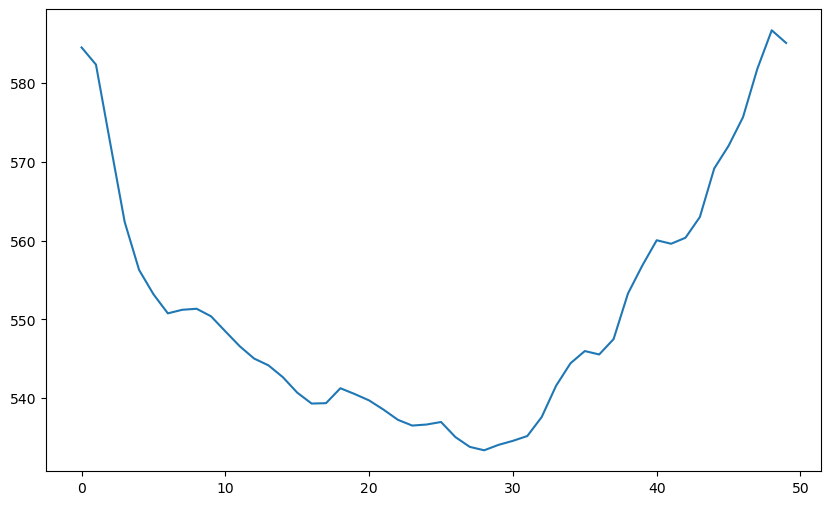

In [22]:
plt.figure(figsize=(10,6))
plt.plot(centroidmotif16.values)
plt.show()